### Task 3

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("agaricus-lepiota.data")

data.head()



,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [32]:
data.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Task 4

In [35]:
data[['habitat','edibility']].groupby('habitat').describe().transpose()

habitat              d     g    l    m     p    u    w
edibility count   3148  2148  832  292  1144  368  192
          unique     2     2    2    2     2    2    1
          top        e     e    p    e     p    p    e
          freq    1880  1408  592  256  1008  272  192

#### Description
From what we can see in the diagram above, it's worth to take a look at the rows "count" and "freq". If we start to look at habitat "d" (Woods), we see there are in total 3148 mushrooms (from count) where 1880 of them are edible (from freq). 

To know whether the mushroom count in frequency are edible or posionous, we need to be looking at which type is in the row "top". If its' "e", we know there are mostly edible mushrooms in the habitat. And the frequency will always be reflecting on the mushroom count of the top variable. 

From the "unique" row, we can see if there is both edible and poisonous mushrooms in the habitat, which there for the most part is. Except for in habitat "w" (Waste), where there is only one type of mushroom => edible. 

Edible


(array([ 272.,    0.,    0.,    0.,  740.,    0.,    0.,    0., 1268.,
           0.,    0.,    0., 1008.,    0.,    0.,    0.,  592.,    0.,
           0.,   36.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

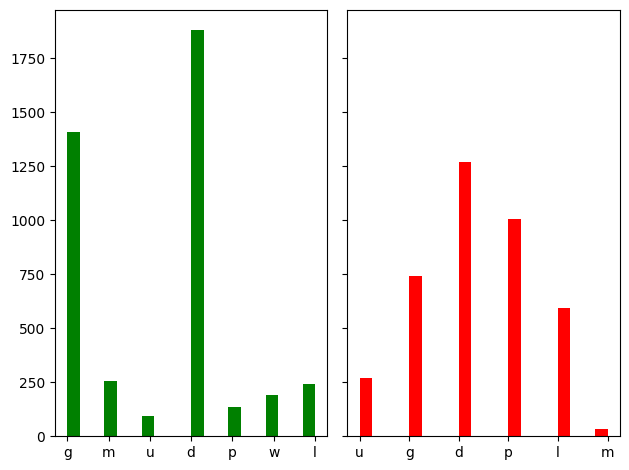

In [46]:
edible = data[data['edibility']== 'e']
non_edible = data[data['edibility'] == 'p']
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(edible['habitat'], bins=20, color='green')
axs[1].hist(non_edible['habitat'], bins=20, color='red')

#### Description
Here we can see how many mushrooms are of the edible or the poisonous type in each habitat. We can also spot that habitat "w" (Waste) is missing on the poisonous graph, which indicates what we assumed from the diagram earlier. 

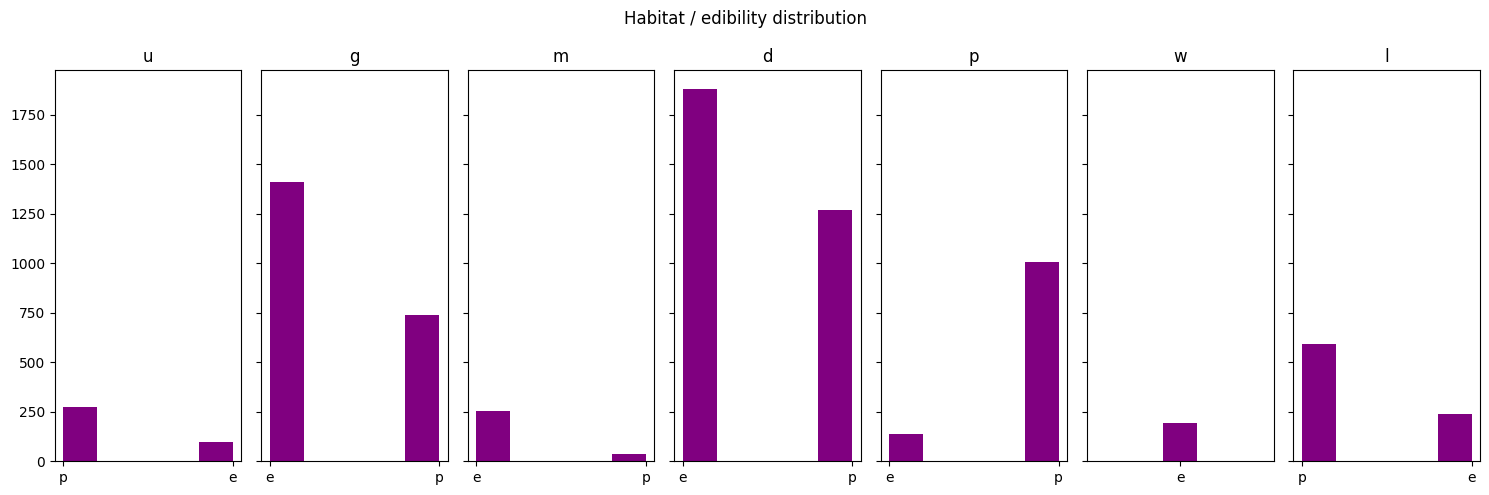

In [54]:
fig, axs = plt.subplots(1, len(data['habitat'].unique()), sharey=True, tight_layout=True, figsize=(15,5))
fig.suptitle('Habitat / edibility distribution')

for index, habitat in enumerate(data['habitat'].unique().tolist()):
	axs[index].title.set_text(habitat)
	axs[index].hist(data[data['habitat'] == habitat]['edibility'], bins=5, color=("purple"))

#### Description

Graph for each particular habitat. Shows the distribution between edible, e, and posionous, p, mushrooms in each one. 

u - urban

g - grasses

m - meadows

d - woods

p - paths

w - waste

l - leaves

### Task 5

In [47]:
dummy_variables = pd.get_dummies(data, prefix=None, prefix_sep=' ')

dummy_variables

,edibility e,edibility p,cap-shape b,cap-shape c,cap-shape f,cap-shape k,cap-shape s,cap-shape x,cap-surface f,cap-surface g,...,population s,population v,population y,habitat d,habitat g,habitat l,habitat m,habitat p,habitat u,habitat w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


#### Description
Dummy variables are practically just a bunch of boolean variables. Is the mushroom edible, then edibility_e is set to 1. If not, it's set to 0 and edibility_p is set to 1. 

This goes for all the different variables. You can see from the diagram that there are multiple dummy variables for population, but for each mushroom, there is only one of them which is set to be 1. The rest is set to 0. This can be used to get a quick overlook of how the mushroom looks, and where you can find it. 

### Task 6

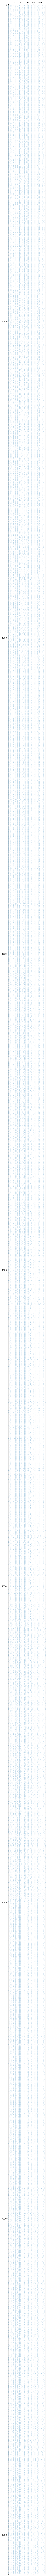

In [48]:
plt.spy(dummy_variables, markersize=0.1)
fig = plt.gcf()
fig.set_size_inches(60, 220)
plt.plot()
plt.show()